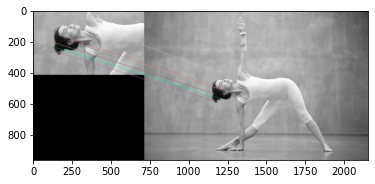

(<matplotlib.image.AxesImage at 0x1bdea696c10>, None)

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('../Images/img5_1.png',cv.IMREAD_GRAYSCALE)          # 索引图像
img2 = cv.imread('../Images/img5.png',cv.IMREAD_GRAYSCALE) # 训练图像
# 初始化ORB检测器
orb = cv.ORB_create()
# 基于ORB找到关键点和检测器
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# 创建BF匹配器的对象
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True) # 匹配描述符.
matches = bf.match(des1,des2) # 根据距离排序
matches = sorted(matches, key = lambda x:x.distance) # 绘制前10的匹配项
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.imshow(img3),plt.show()

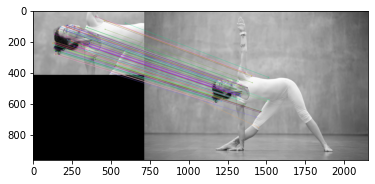

(<matplotlib.image.AxesImage at 0x1bd8060ad00>, None)

In [2]:
img1 = cv.imread('../Images/img5_1.png',cv.IMREAD_GRAYSCALE)          # 索引图像
img2 = cv.imread('../Images/img5.png',cv.IMREAD_GRAYSCALE) # 训练图像
# 初始化SIFT描述符
sift = cv.xfeatures2d.SIFT_create()
# 基于SIFT找到关键点和描述符
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# 默认参数初始化BF匹配器
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# 应用比例测试
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn将列表作为匹配项。
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

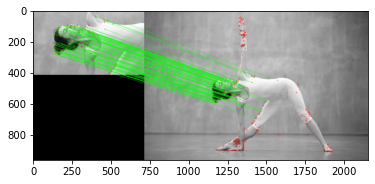

(<matplotlib.image.AxesImage at 0x1bd80001cd0>, None)

In [3]:
img1 = cv.imread('../Images/img5_1.png',cv.IMREAD_GRAYSCALE)          # 索引图像
img2 = cv.imread('../Images/img5.png',cv.IMREAD_GRAYSCALE) # 训练图像
# 初始化SIFT描述符
sift = cv.xfeatures2d.SIFT_create()
# 基于SIFT找到关键点和描述符
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN的参数
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # 或传递一个空字典
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# 只需要绘制好匹配项，因此创建一个掩码
matchesMask = [[0,0] for i in range(len(matches))]
# 根据Lowe的论文进行比例测试
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()